Vanguard Sector ETFs
- [Vanguard Sector ETFs](https://investor.vanguard.com/investment-products/list/etfs?assetclass=sector_specialty&filters=open)

- VOX Communication Services
- VCR Consumer Discretionary
- VDC Consumer Staples
- VDE Energy
- VFH Financials
- VHT Health Care
- VIS Industrials
- VGT Information Technology
- VAW Materials
- VNQ Real Estate
- VPU Utilities

Yahoo Finance Python Project
- [Yahoo Finance Python Project](https://pypi.org/project/yfinance/)
- 1y, 1mo, etc.

- [Seaborn](https://seaborn.pydata.org/index.html)

In [1]:
# import modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg

In [88]:
# globals
TIME_PERIOD = "1y" # yahoo finance format
LOR = 3
DATASETS = [
    'VOX Communication Services',
    'VCR Consumer Discretionary',
    'VDC Consumer Staples',
    'VDE Energy',
    'VFH Finacials',
    'VHT Health Car',
    'VIS Industrials',
    'VGT Information Technology',
    'VAW Materials',
    'VNQ Real Estate',
    'VPU Utilities'
] # 11 sector etfs

In [47]:
# functions

# compare_col = name of column that is compared to get the up and down states
def calculate_state(df, compare_col, lor):
    df['upstate'] = 0
    df['downstate'] = 0
    df['totalstate'] = 0 # total state is upstate and downstate combined where downstate values are negative (zeroes will exist at state switch)
    df['flowstate'] = 0 # running tally where upstate gives plus 1 and downstate gives minus 1
    df['returns'] = df['Close']
    df['returns_per'] = 0
    df['lor_returns'] = 0
    df['lor_returns_per'] = 0
    prev_row = df.iloc[0]
    for index, curr_row in df.iterrows():
        if index > 0:
            # upstate flow
            if prev_row[compare_col] < curr_row[compare_col]:
                df.at[index, 'upstate'] = prev_row['upstate'] + 1
                df.at[index, 'flowstate'] = prev_row['flowstate'] + 1
                # if state switches (fron down to up), restart count
                if prev_row["downstate"] != 0:
                    df.at[index, 'totalstate'] = 0
                else:
                    df.at[index, 'totalstate'] = prev_row['totalstate'] + 1
            # downstate flow
            else:
                df.at[index, 'downstate'] = prev_row['downstate'] + 1
                df.at[index, 'flowstate'] = prev_row['flowstate'] - 1
                # if state switches (from up to down), restart count
                if prev_row["upstate"] != 0:
                    df.at[index, 'totalstate'] = 0
                else:
                    df.at[index, 'totalstate'] = prev_row['totalstate'] - 1
            # calculate returns
            df.at[index, 'returns'] = curr_row['Close'] - prev_row['Close']
            df.at[index, 'returns_per'] = (curr_row['Close'] - prev_row['Close']) / prev_row['Close'] * 100
            
            # calculate next day returns
            # ex: lor = 5
            if (index < len(df)-lor):
                lor_row = df.iloc[index + lor] #5th day
                # 5th day close - curr close = return over 5 days? Yes
                # can we use df.pct_chg()?
                df.at[index, 'lor_returns'] = (lor_row['Close'] - curr_row['Close'])
                df.at[index, 'lor_returns_per'] = (lor_row['Close'] - curr_row['Close']) / curr_row['Close'] * 100
            
            prev_row = df.iloc[index] # use df and index bc 'curr_row' is a copy
    return df


def plot_histogram(df, data_col_name, title, xlabel, xlim, xmax, ylabel, ylim, ymax):
    # Plot Histogram
    # https://seaborn.pydata.org/tutorial/distributions.html
    upper_threshold = np.quantile(df[data_col_name].iloc[1:], .95)
    lower_threshold = np.quantile(df[data_col_name].iloc[1:], .05)

    sns.displot(df[data_col_name], kde=True, discrete=True)
    plt.axvline(x=upper_threshold, linewidth=1, color='green', ls='--')
    plt.axvline(x=lower_threshold, linewidth=1, color='red', ls='--')
    plt.title(title)
    plt.xlim(xlim, xmax)
    plt.xlabel(xlabel)
    plt.ylim(ylim, ymax)
    plt.ylabel(ylabel)
    plt.show()

    # counts, edges, bars = plt.hist(df[data_col_name], bins=len(set(df[data_col_name])))
    # plt.bar_label(bars)

    # plt.title(title)
    # plt.xlim(xlim, xmax)
    # plt.xlabel(xlabel)
    # plt.ylim(ylim, ymax)
    # plt.ylabel(ylabel)
    # plt.show()

In [4]:
# load the 11 vanguard sector etfs
vox = yf.Ticker("VOX")
vcr = yf.Ticker("VCR")
vdc = yf.Ticker("VDC")
vde = yf.Ticker("VDE")
vfh = yf.Ticker("VFH")
vht = yf.Ticker("VHT")
vis = yf.Ticker("VIS")
vgt = yf.Ticker("VGT")
vaw = yf.Ticker("VAW")
vnq = yf.Ticker("VNQ")
vpu = yf.Ticker("VPU")

sector_etf_tps = [] # list of dataframes

vox_tp = vox.history(period=TIME_PERIOD)
sector_etf_tps.append(vox_tp)

vcr_tp = vcr.history(period=TIME_PERIOD)
sector_etf_tps.append(vcr_tp)

vdc_tp = vdc.history(period=TIME_PERIOD)
sector_etf_tps.append(vdc_tp)

vde_tp = vde.history(period=TIME_PERIOD)
sector_etf_tps.append(vde_tp)

vfh_tp = vfh.history(period=TIME_PERIOD)
sector_etf_tps.append(vfh_tp)

vht_tp = vht.history(period=TIME_PERIOD)
sector_etf_tps.append(vht_tp)

vis_tp = vis.history(period=TIME_PERIOD)
sector_etf_tps.append(vis_tp)

vgt_tp = vgt.history(period=TIME_PERIOD)
sector_etf_tps.append(vgt_tp)

vaw_tp = vaw.history(period=TIME_PERIOD)
sector_etf_tps.append(vaw_tp)

vnq_tp = vnq.history(period=TIME_PERIOD)
sector_etf_tps.append(vnq_tp)

vpu_tp = vpu.history(period=TIME_PERIOD)
sector_etf_tps.append(vpu_tp)

In [5]:
vox_tp

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-10-05 00:00:00-04:00,104.185515,104.403125,103.166708,104.136055,96600,0.0,0.0,0.0
2023-10-06 00:00:00-04:00,103.324954,106.272577,103.324954,105.995621,100500,0.0,0.0,0.0
2023-10-09 00:00:00-04:00,105.570297,107.469433,105.303226,107.202362,151400,0.0,0.0,0.0
2023-10-10 00:00:00-04:00,107.469435,108.488242,107.232045,107.667259,151100,0.0,0.0,0.0
2023-10-11 00:00:00-04:00,108.023353,108.963035,107.904654,108.468468,101600,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-09-30 00:00:00-04:00,144.779999,145.589996,144.339996,145.389999,150300,0.0,0.0,0.0
2024-10-01 00:00:00-04:00,146.169998,146.380005,144.119995,145.479996,107700,0.0,0.0,0.0
2024-10-02 00:00:00-04:00,145.100006,145.479996,144.710007,145.190002,110700,0.0,0.0,0.0


In [89]:
sector_etf_idx_state = [] # list of dataframes

vox_tp_idx = vox_tp.reset_index()
vox_tp_idx_state = calculate_state(vox_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vox_tp_idx_state)

vcr_tp_idx = vcr_tp.reset_index()
vcr_tp_idx_state = calculate_state(vcr_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vcr_tp_idx_state)

vdc_tp_idx = vdc_tp.reset_index()
vdc_tp_idx_state = calculate_state(vdc_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vdc_tp_idx_state)

vde_tp_idx = vde_tp.reset_index()
vde_tp_idx_state = calculate_state(vde_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vde_tp_idx_state)

vfh_tp_idx = vfh_tp.reset_index()
vfh_tp_idx_state = calculate_state(vfh_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vfh_tp_idx_state)

vht_tp_idx = vht_tp.reset_index()
vht_tp_idx_state = calculate_state(vht_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vht_tp_idx_state)

vis_tp_idx = vis_tp.reset_index()
vis_tp_idx_state = calculate_state(vis_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vis_tp_idx_state)

vgt_tp_idx = vgt_tp.reset_index()
vgt_tp_idx_state = calculate_state(vgt_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vgt_tp_idx_state)

vaw_tp_idx = vaw_tp.reset_index()
vaw_tp_idx_state = calculate_state(vaw_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vaw_tp_idx_state)

vnq_tp_idx = vnq_tp.reset_index()
vnq_tp_idx_state = calculate_state(vnq_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vnq_tp_idx_state)

vpu_tp_idx = vpu_tp.reset_index()
vpu_tp_idx_state = calculate_state(vpu_tp_idx, compare_col="Close", lor=LOR)
sector_etf_idx_state.append(vpu_tp_idx_state)

In [90]:
VOX_AVG_RETURN_PER = vox_tp_idx_state['returns_per'].mean()
VOX_AVG_RETURN = vox_tp_idx_state['returns'].mean()
VOX_TOTAL_RETURN_PER = (vox_tp_idx_state.at[len(vox_tp_idx_state)-1, 'Close'] - vox_tp_idx_state.at[0, 'Close']) / vox_tp_idx_state.at[0, 'Close'] * 100
VOX_TOTAL_RETURN = vox_tp_idx_state.at[len(vox_tp_idx_state)-1, 'Close'] - vox_tp_idx_state.at[0, 'Close']

In [91]:
print("VOX Avg Return Percent:  %.2f" % VOX_AVG_RETURN_PER)
print("VOX Avg Return:  %.2f" % VOX_AVG_RETURN)
print("VOX Total Return Percent: %.2f" % VOX_TOTAL_RETURN_PER) # percent return from start of period
print("VOX Total Return: %.2f" % VOX_TOTAL_RETURN) # absolute return from start of period

VOX Avg Return Percent:  0.14
VOX Avg Return:  0.58
VOX Total Return Percent: 40.73
VOX Total Return: 42.41


In [92]:
vox_tp_idx_state

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,upstate,downstate,totalstate,flowstate,returns,returns_per,lor_returns,lor_returns_per
0,2023-10-05 00:00:00-04:00,104.185515,104.403125,103.166708,104.136055,96600,0.0,0.0,0.0,0,0,0,0,104.136055,0.000000,0.000000,0.000000
1,2023-10-06 00:00:00-04:00,103.324954,106.272577,103.324954,105.995621,100500,0.0,0.0,0.0,1,0,1,1,1.859566,1.785708,2.472847,2.332971
2,2023-10-09 00:00:00-04:00,105.570297,107.469433,105.303226,107.202362,151400,0.0,0.0,0.0,2,0,2,2,1.206741,1.138482,0.000000,0.000000
3,2023-10-10 00:00:00-04:00,107.469435,108.488242,107.232045,107.667259,151100,0.0,0.0,0.0,3,0,3,3,0.464897,0.433663,-1.859573,-1.727148
4,2023-10-11 00:00:00-04:00,108.023353,108.963035,107.904654,108.468468,101600,0.0,0.0,0.0,4,0,4,4,0.801208,0.744152,-0.989151,-0.911925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2024-09-30 00:00:00-04:00,144.779999,145.589996,144.339996,145.389999,150300,0.0,0.0,0.0,3,0,2,49,0.479996,0.331237,-0.199997,-0.137559
248,2024-10-01 00:00:00-04:00,146.169998,146.380005,144.119995,145.479996,107700,0.0,0.0,0.0,4,0,3,50,0.089996,0.061900,1.070007,0.735501
249,2024-10-02 00:00:00-04:00,145.100006,145.479996,144.710007,145.190002,110700,0.0,0.0,0.0,0,1,0,49,-0.289993,-0.199336,0.000000,0.000000
250,2024-10-03 00:00:00-04:00,144.380005,145.250000,144.289993,145.190002,100700,0.0,0.0,0.0,0,2,-1,48,0.000000,0.000000,0.000000,0.000000


Ex: T-Test
Is it statistically significant that after 4 consecutive upstates communication services outperforms the returns of an average day? (need positive and negative returns)

Compare performance of 11 next days after 4 day streak to any other day
Baseline is everyday
10/11 days the returns after a 4 day streak outperform an average day
What is the p-value?

In [ ]:
# forward_return_days = 7
# i = forward_return_days
# while i < len(tsla_price_data) - forward_return_days:
#     tsla_price_data.loc[i, 'Following 7d Return'] = np.sum(tsla_price_data.loc[i : i + forward_return_days, 'Chg_Pct'])
#     i += 1

In [96]:
state = "downstate"
value = 2 # 95th percentile
# state = "flowstate"
# value = -1 # 95th percentile

b = vox_tp_idx_state['returns_per'].iloc[1:len(vox_tp_idx_state)] # daily returns for everyday, regardless of state (benchmark)
lordf = vox_tp_idx_state[1:len(vox_tp_idx_state)-LOR]
tdf = lordf.drop(lordf[lordf[state] != value].index) # drop all rows that are not the target state
tper = tdf['lor_returns_per'] # target
ttot = tdf['lor_returns']

In [94]:
b

1      1.785708
2      1.138482
3      0.433663
4      0.744152
5     -1.167257
         ...   
247    0.331237
248    0.061900
249   -0.199336
250    0.000000
251    0.936704
Name: returns_per, Length: 251, dtype: float64

In [100]:
print("VOX Avg Return Percent:  %.2f" % VOX_AVG_RETURN_PER)
print("VOX Avg Return:  %.2f" % VOX_AVG_RETURN)
print("VOX Total Return Percent: %.2f" % VOX_TOTAL_RETURN_PER) # percent return from start of period
print("VOX Total Return: %.2f" % VOX_TOTAL_RETURN) # absolute return from start of period

# ex: State is downstate value of 2, length of return is 5 days
print("")
print("Test State VOX Avg Return Percent: %.2f" % tper.mean())
print("Test State VOX Avg Return: %.2f" % ttot.mean())
# estimate: percent return of the sum of returns, using the strategy, to the initial close price
print("Test State VOX Total Return Percent: %.2f" % (sum(ttot) / vox_tp_idx_state.at[0, 'Close'] * 100))
print("Test State VOX Total Return: %.2f" % sum(ttot))

VOX Avg Return Percent:  0.14
VOX Avg Return:  0.58
VOX Total Return Percent: 40.73
VOX Total Return: 42.41

Test State VOX Avg Return Percent: 1.14
Test State VOX Avg Return: 1.39
Test State VOX Total Return Percent: 33.41
Test State VOX Total Return: 34.80


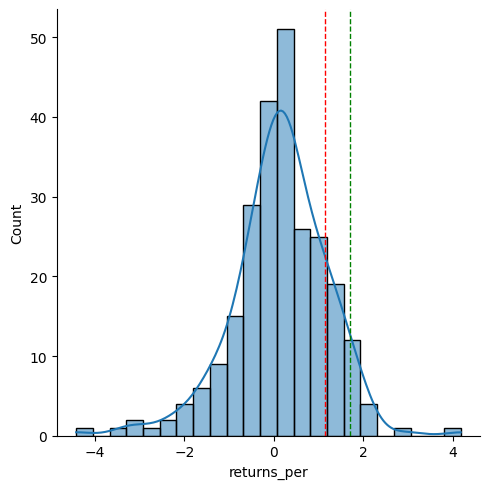

In [102]:
# distribution of returns for any normal day -> want returns to be past the 0.95 line we plot

threshold = np.quantile(vox_tp_idx_state['returns_per'].iloc[1:], .95)
sns.displot(vox_tp_idx_state['returns_per'].iloc[1:], kde=True)
plt.axvline(x=threshold, linewidth=1, color='green', ls='--')
plt.axvline(x=tper.mean(), linewidth=1, color='red', ls='--')
plt.show()

In [104]:
# y = tsla_price_data.loc[tsla_price_data['Streak'] == label, 'Next Chg_Pct']

# need to drop target state rows for independent t-test
bdf = vox_tp_idx_state.drop(vox_tp_idx_state[vox_tp_idx_state[state] == value].index) # drop all rows that ARE the target state
b = bdf['returns_per'].iloc[1:] # returns for everyday excluding target state

results = pg.ttest(b, tper, alternative = 'greater')
results

# for label in labels:
#     y = tsla_price_data.loc[tsla_price_data['Streak'] == label, 'Next Chg_Pct']
#     results = pg.ttest(x, y, alternative = 'greater')
#     p_val_dict[label] = results.loc[results.index[0], 'p-val']

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.63317,26.118927,greater,0.992988,"[-1.44, inf]",0.802875,0.108,2.621119e-08


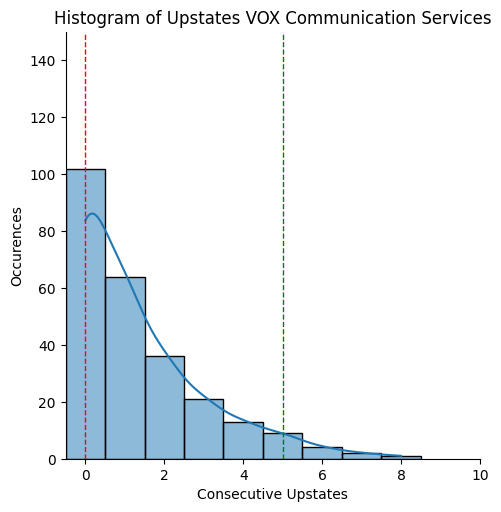

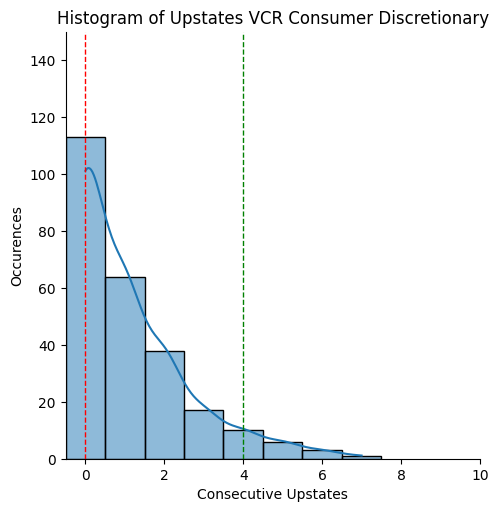

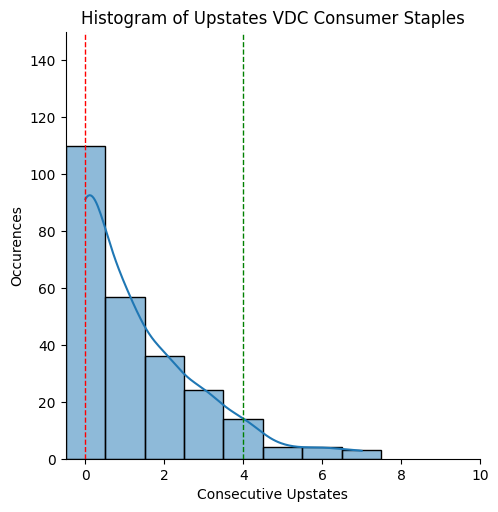

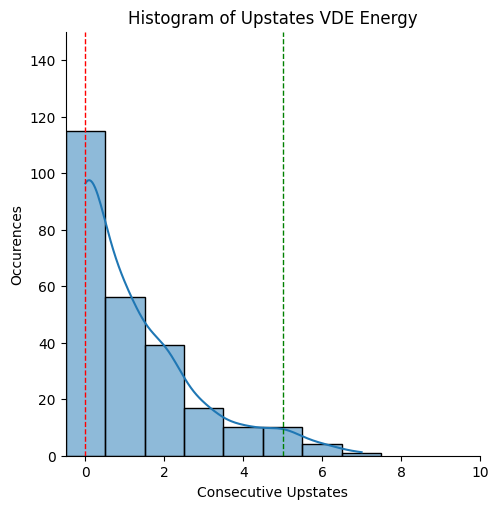

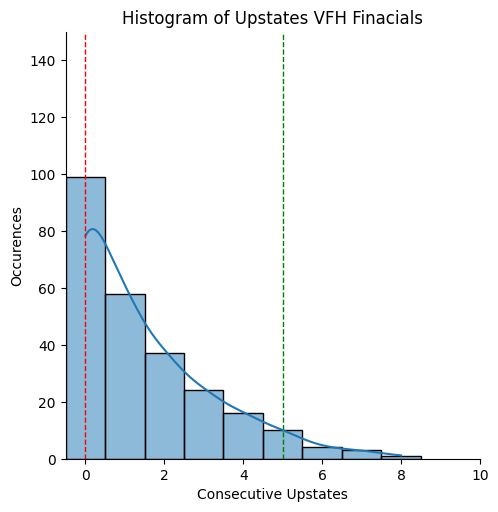

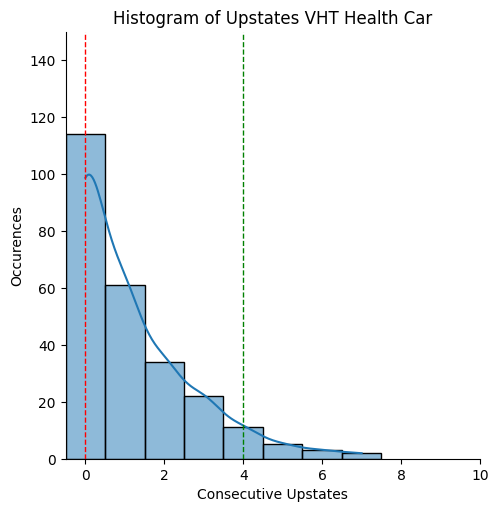

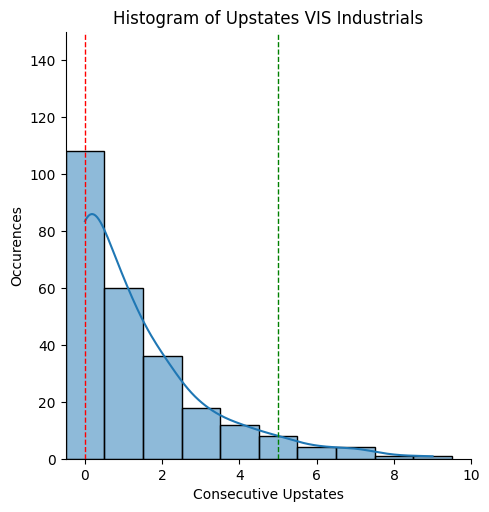

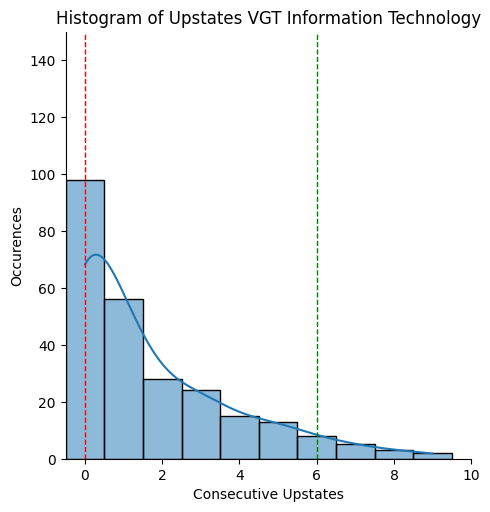

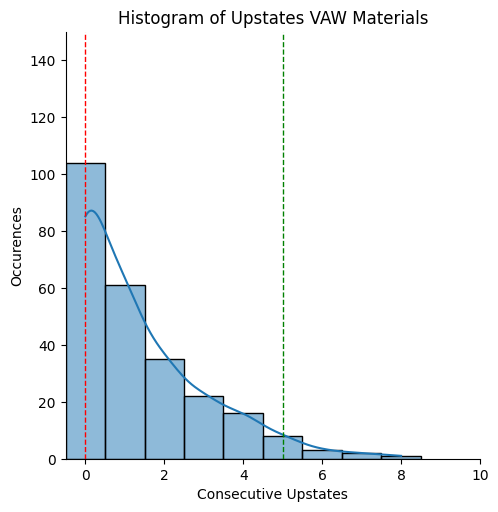

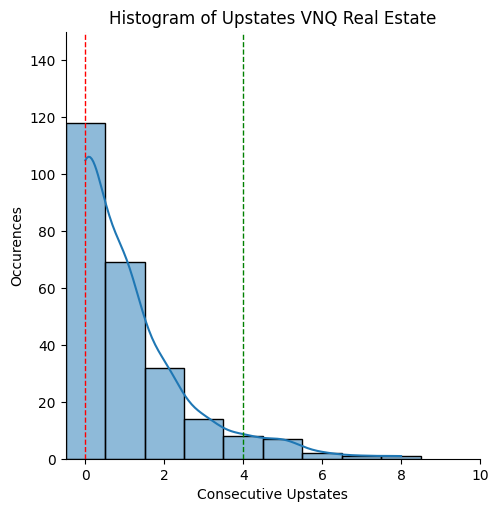

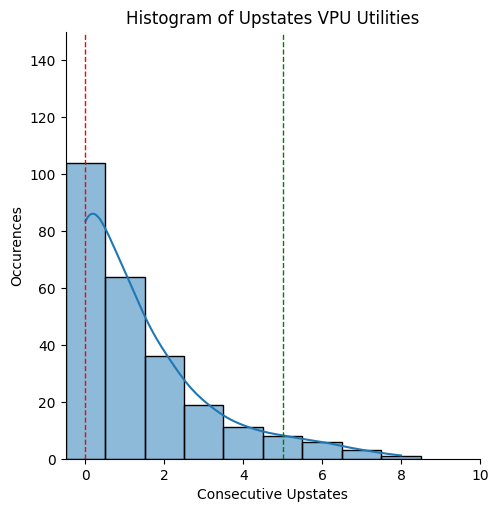

In [24]:
# plot upstates
for i in range(len(DATASETS)):
    etf_name = DATASETS[i]
    histogram_title = "Histogram of Upstates {}".format(etf_name)
    # plot_histogram(sector_etf_idx_state[i], 'upstate', histogram_title, "Consecutive Upstates", 0, 10, "Occurences", 0, 150)
    plot_histogram(sector_etf_idx_state[i], 'upstate', histogram_title, "Consecutive Upstates", -0.5, 10, "Occurences", 0, 150)

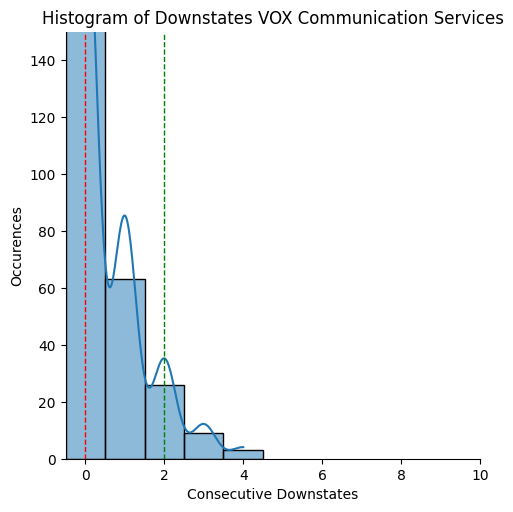

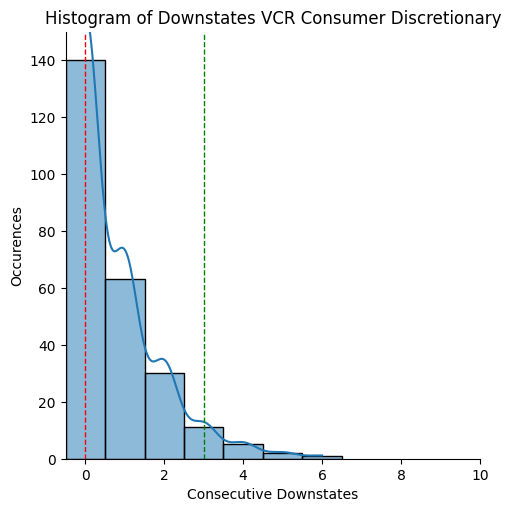

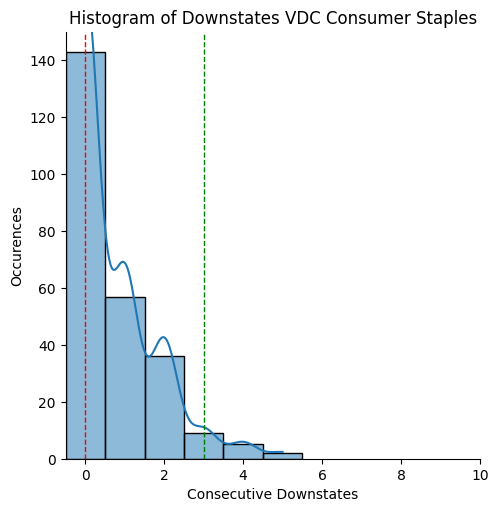

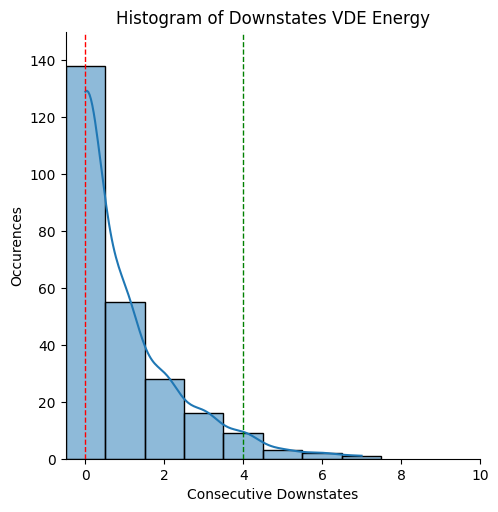

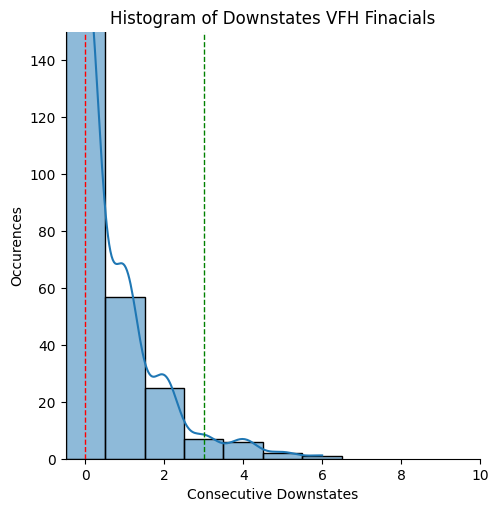

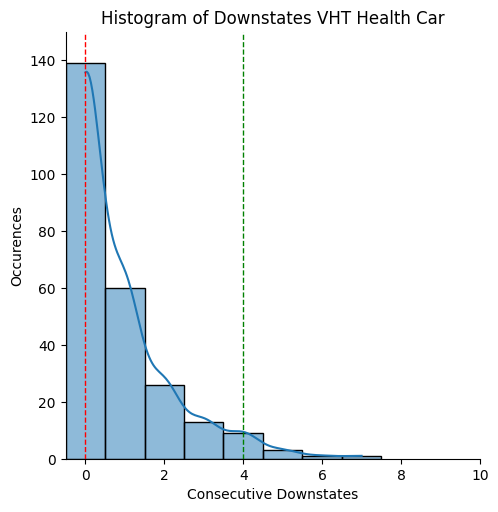

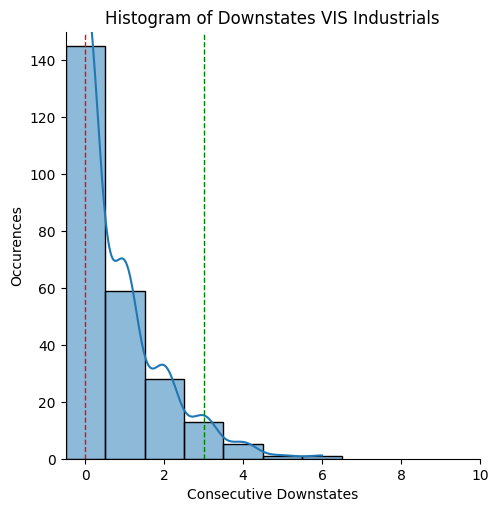

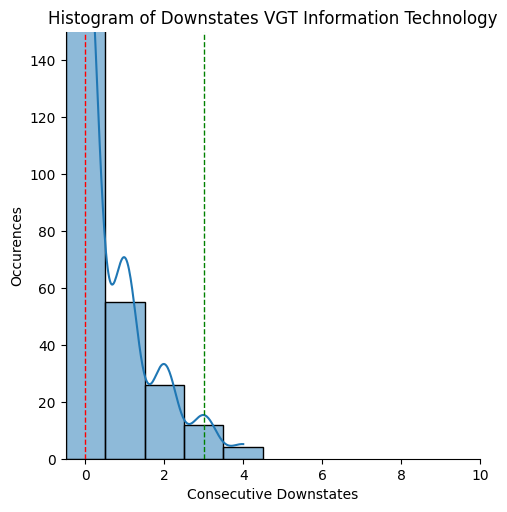

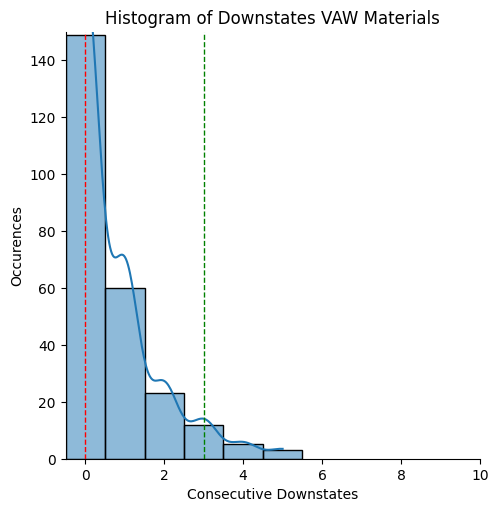

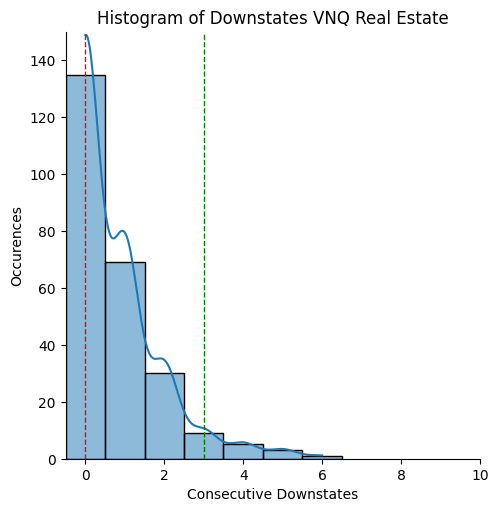

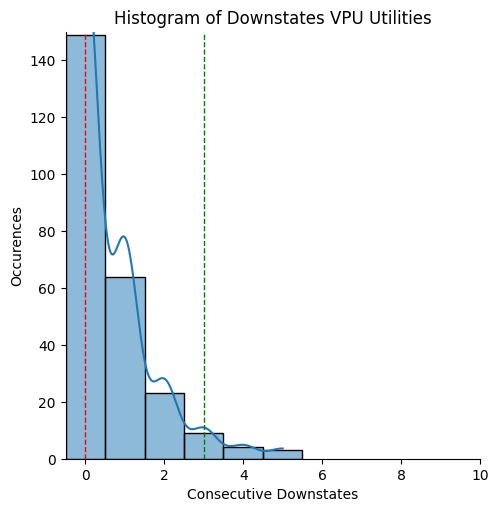

In [25]:
# plot downstates
for i in range(len(DATASETS)):
    etf_name = DATASETS[i]
    histogram_title = "Histogram of Downstates {}".format(etf_name)
    plot_histogram(sector_etf_idx_state[i], 'downstate', histogram_title, "Consecutive Downstates", -0.5, 10, "Occurences", 0, 150)

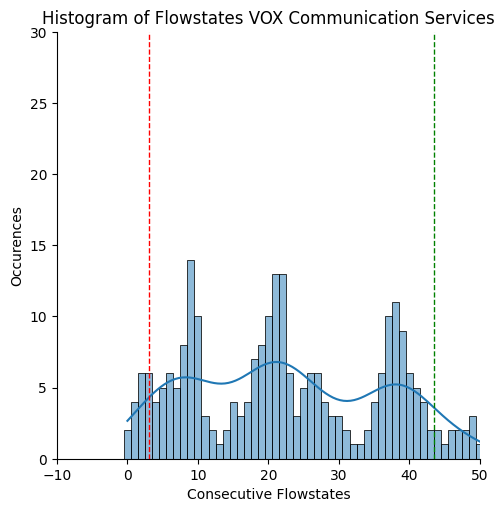

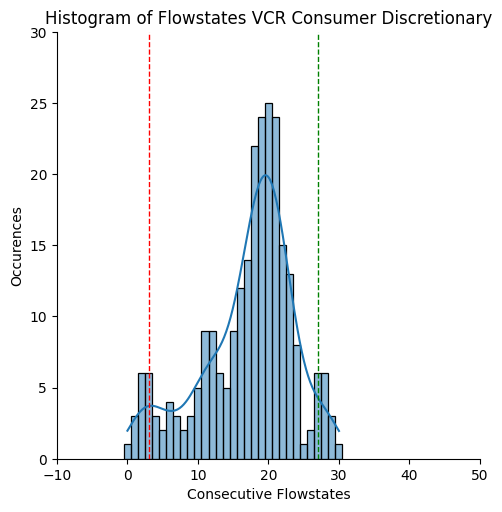

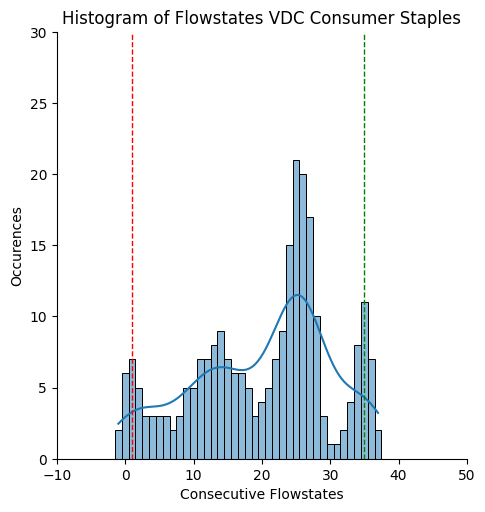

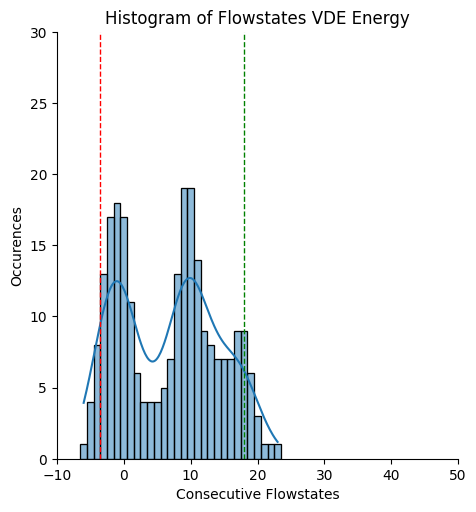

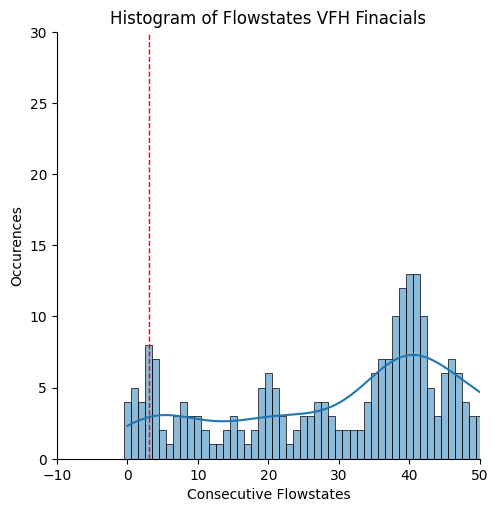

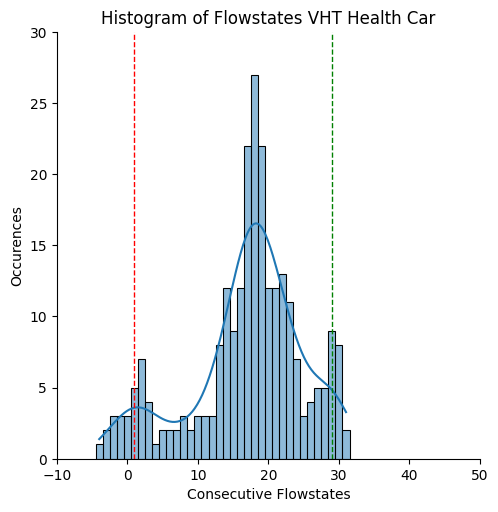

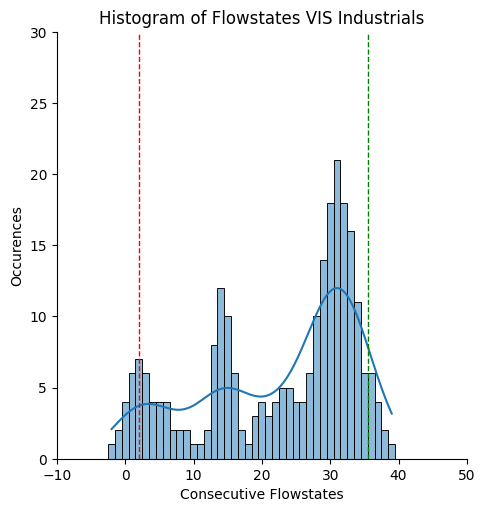

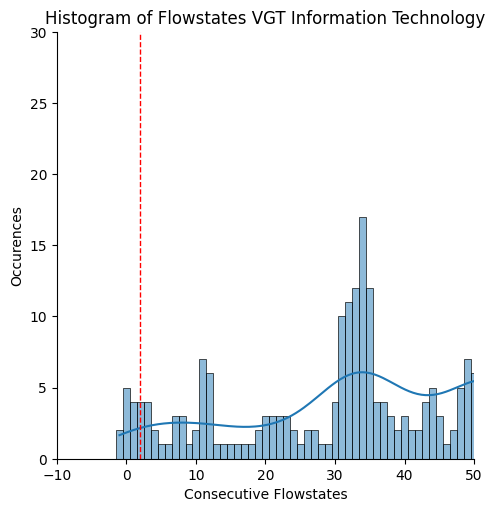

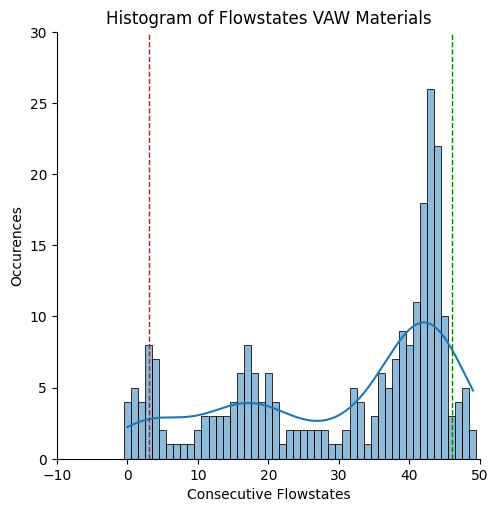

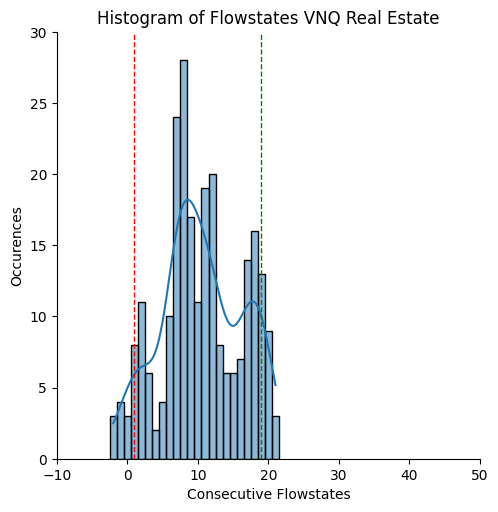

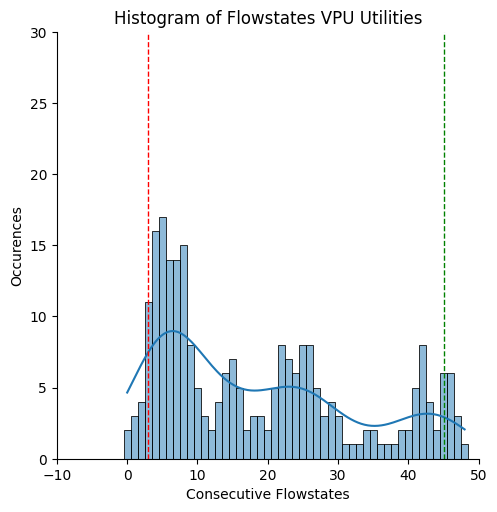

In [26]:
# plot flowstates
for i in range(len(DATASETS)):
    etf_name = DATASETS[i]
    histogram_title = "Histogram of Flowstates {}".format(etf_name)
    plot_histogram(sector_etf_idx_state[i], 'flowstate', histogram_title, "Consecutive Flowstates", -10, 50, "Occurences", 0, 30)

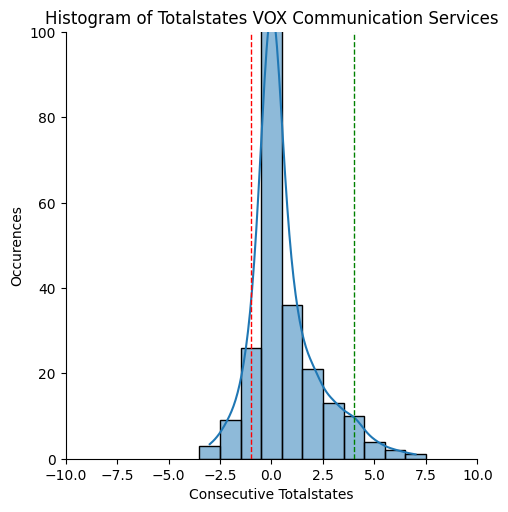

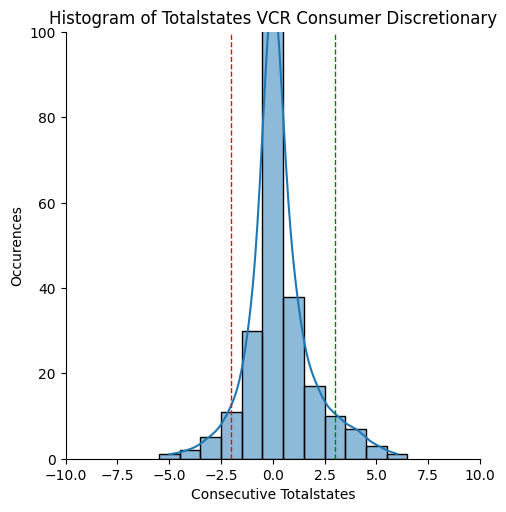

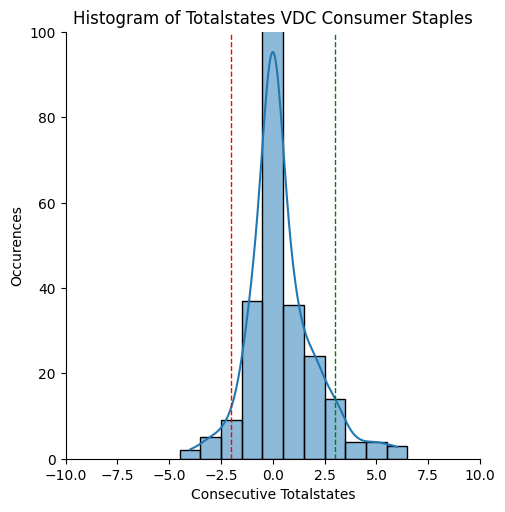

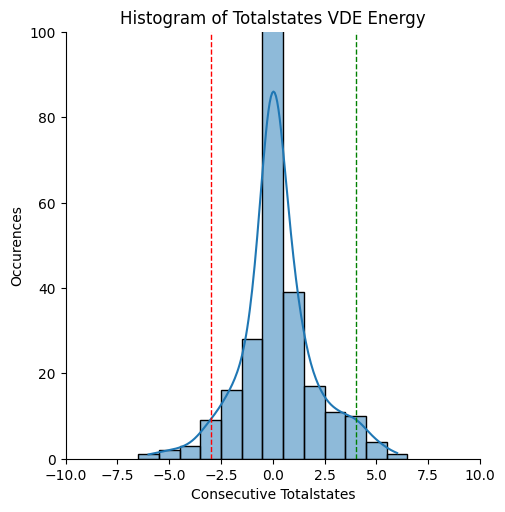

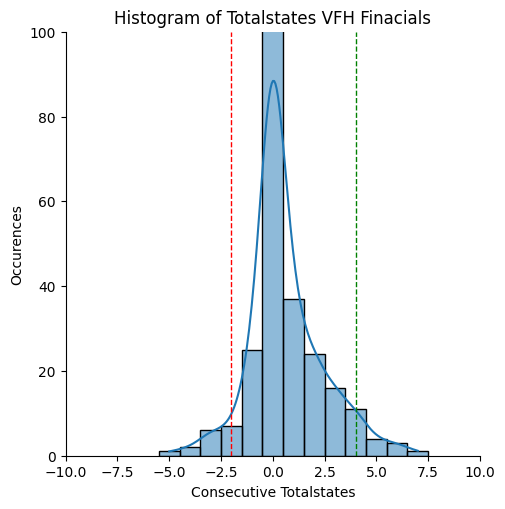

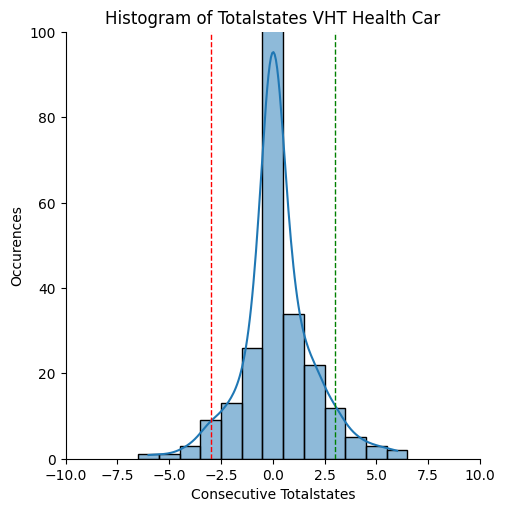

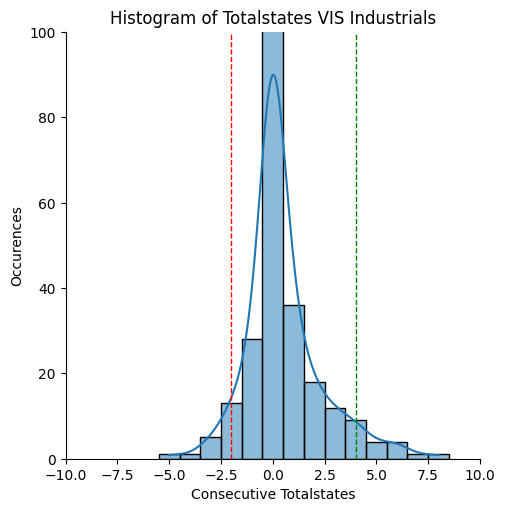

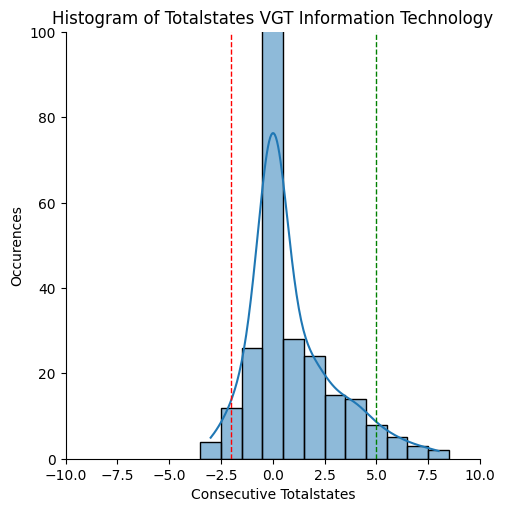

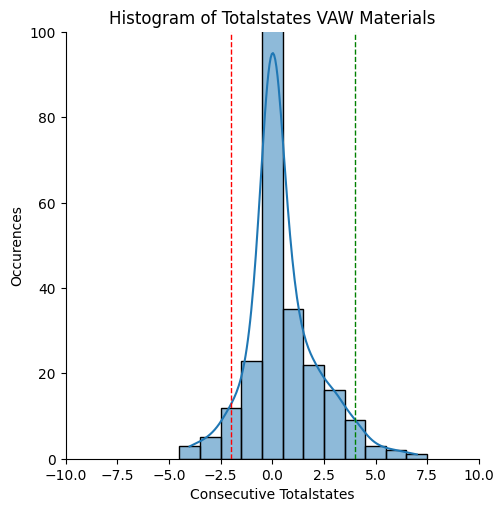

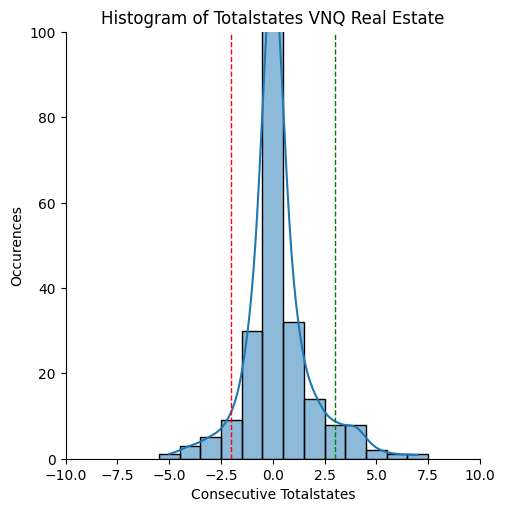

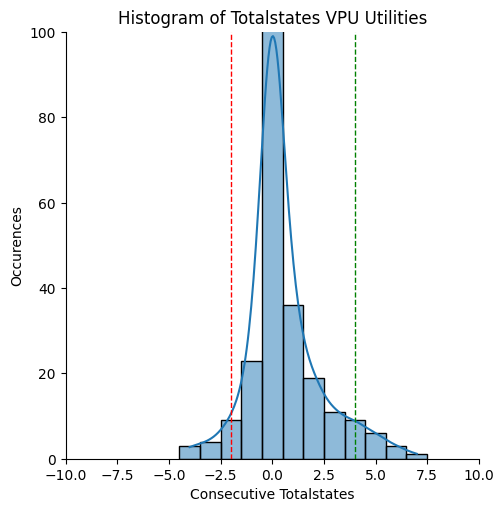

In [27]:
# plot totalstates
for i in range(len(DATASETS)):
    etf_name = DATASETS[i]
    histogram_title = "Histogram of Totalstates {}".format(etf_name)
    plot_histogram(sector_etf_idx_state[i], 'totalstate', histogram_title, "Consecutive Totalstates", -10, 10, "Occurences", 0, 100)
